In [4]:
import os

os.chdir(r"C:\Users\sahik\Music\bitirme_otizm_DATA\archive\consolidated")
os.getcwd()

'C:\\Users\\sahik\\Music\\bitirme_otizm_DATA\\archive\\consolidated'

In [5]:
import os
import cv2 
from tqdm import tqdm 

folder_address = "autistic"
size = 64
channel = 3

data = []

for picture_name in tqdm(os.listdir(folder_address)):
    
  
    picture_address = os.path.join(folder_address, picture_name)
    picture = cv2.imread(picture_address, cv2.IMREAD_COLOR)

    if picture is not None:
        picture = cv2.resize(picture, (size,size))
        data.append([picture])

100%|████████████████████████████████████████████████████████████████████████████| 1468/1468 [00:01<00:00, 1376.37it/s]


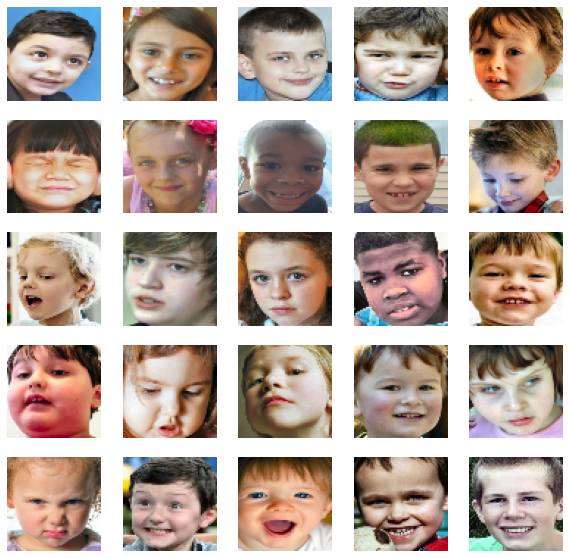

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

for i in range(25):
    
    plt.subplot(5, 5, i+1)
  
    plt.imshow(cv2.cvtColor(data[i][0], cv2.COLOR_BGR2RGB))
    plt.axis("off")
plt.show()

In [7]:
import numpy as np
data = np.array(data).reshape(-1, size, size, channel).astype('float32')
data = (data - 127.5) / 127.5

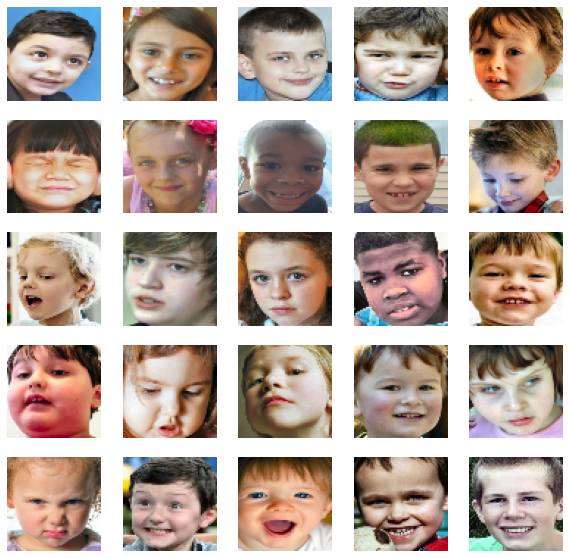

In [8]:
fig = plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(cv2.cvtColor( ( (data[i] * 127.5) + 127.5 ).astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()

In [9]:
import tensorflow as tf

BATCH_SIZE = 256

data = tf.data.Dataset.from_tensor_slices(data).batch(BATCH_SIZE)

In [10]:
from tensorflow.keras import layers

NOISE_SIZE = 100 

initializer = tf.random_normal_initializer(0., 0.02)

gen_model = tf.keras.Sequential()

gen_model.add(layers.Dense(4*4*128, use_bias=False, input_shape=(NOISE_SIZE,)))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())
gen_model.add(layers.Reshape((4,4,128))) 

gen_model.add(layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(filters=32, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
gen_model.add(layers.BatchNormalization())
gen_model.add(layers.LeakyReLU())

gen_model.add(layers.Conv2DTranspose(channel, kernel_size=(5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False, activation='tanh'))


tf.Tensor(
[[-1.4018043  -1.6210679  -0.8904049  -0.21847145  1.8350185  -1.0005552
  -0.91130584 -1.9282814   0.15097526  0.91799986 -0.5528635  -2.3098602
  -0.7100595   0.32214716 -0.94138277 -1.6463065  -0.29532114 -0.71696436
   0.9635094  -0.33706653 -1.5625837   0.65520525  0.89129156  0.7185924
  -2.0694122  -0.91217077  0.77881384 -0.728763   -1.7417272   1.1357988
   0.44926882  0.05430651  0.4726385  -0.82423407 -1.2983332  -0.95026296
   0.8776512   1.6861016   0.9751474  -0.84186494  0.8586067   0.6551253
  -0.42837468  1.7255191  -0.6127413   0.18996942 -1.1059415   0.39518526
  -1.0300962  -1.2511994   0.2686026  -0.11808904 -1.0921688   0.0633956
   0.43932575  1.2588005   0.78847104  0.6201839  -2.312633   -0.5261743
  -0.1374099   1.1205972  -1.1683547  -0.08853903  0.28101194 -1.1877927
  -0.40838924  0.07089636  0.1211895  -1.669809   -0.7657572   0.05705783
  -1.463064   -0.35598314 -0.94357926  0.06434188  1.6464146  -0.5115929
   0.62443787  0.99616706 -0.0264333

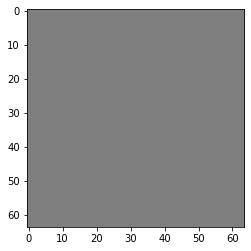

In [11]:
noise = tf.random.normal([1,100]) 
print(noise)

test_picture = gen_model(noise, training=False)

plt.imshow(cv2.cvtColor((test_picture[0] * 127.5 + 127.5).numpy().reshape(size,size,channel).astype('uint8'), cv2.COLOR_BGR2RGB))

In [12]:
dis_model = tf.keras.Sequential()

dis_model.add(layers.Conv2D(32, (7,7), strides=(2,2), padding='same', input_shape=[size,size,channel], kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same', kernel_initializer=initializer, use_bias=False))
dis_model.add(layers.BatchNormalization())
dis_model.add(layers.LeakyReLU())
dis_model.add(layers.Dropout(0.2))

dis_model.add(layers.Flatten())

dis_model.add(layers.Dense(1))

In [13]:
print(dis_model(test_picture))

tf.Tensor([[9.4911695e-05]], shape=(1, 1), dtype=float32)


In [14]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def dis_loss(real_output, fake_output):
 
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)  
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

    total_loss = real_loss + fake_loss
    return total_loss

def gen_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [15]:
gen_opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
dis_opt = tf.keras.optimizers.Adam(learning_rate=1e-4) 

In [16]:
@tf.function
def train_step(images):
    
    noise = tf.random.normal([BATCH_SIZE, NOISE_SIZE])
    

    with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape:

        generated_images = gen_model(noise, training=True) 

        real_output = dis_model(images, training=True)
        fake_output = dis_model(generated_images, training=True)

        gen_loss_val = gen_loss(fake_output)
        dis_loss_val = dis_loss(real_output, fake_output)

    grad_gen = gen_tape.gradient(gen_loss_val, gen_model.trainable_variables)
    grad_dis = dis_tape.gradient(dis_loss_val, dis_model.trainable_variables)

    gen_opt.apply_gradients(zip(grad_gen, gen_model.trainable_variables))
    dis_opt.apply_gradients(zip(grad_dis, dis_model.trainable_variables))

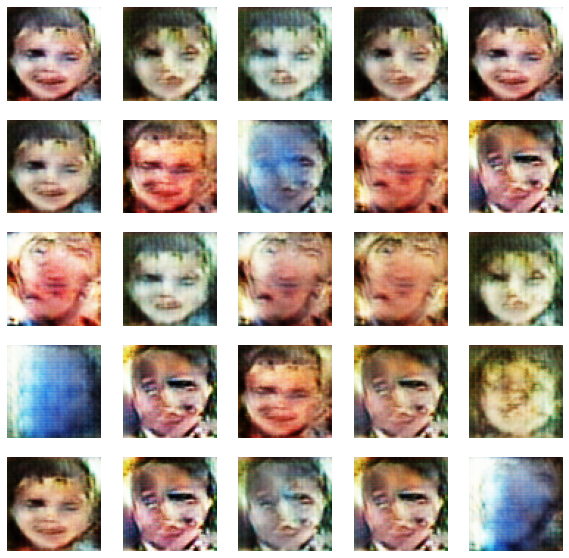

In [ ]:
from IPython import display

EPOCHS = 10000000

seed = tf.random.normal([25, NOISE_SIZE]) 

for epoch in range(EPOCHS):

    for image_batch in data:

        train_step(image_batch) 

    predictions = gen_model(seed, training=False) 

    fig = plt.figure(figsize=(10,10))

    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1)
        plt.imshow(cv2.cvtColor((predictions[i] * 127.5 + 127.5).numpy().reshape(size,size,channel).astype('uint8'), cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

    data.shuffle(10000)
 
    display.clear_output(wait=True)